In [12]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# For Paper 366

In [13]:
import os
print(os.listdir('/kaggle/input'))


['brain-tumor-mri-images-44c']


In [8]:
import os

for root, dirs, files in os.walk('/kaggle/input'):
    print(root)



/kaggle/input
/kaggle/input/brain-tumor-mri-images-44c
/kaggle/input/brain-tumor-mri-images-44c/Papiloma T2
/kaggle/input/brain-tumor-mri-images-44c/Tuberculoma T1C+
/kaggle/input/brain-tumor-mri-images-44c/Granuloma T1
/kaggle/input/brain-tumor-mri-images-44c/Carcinoma T2
/kaggle/input/brain-tumor-mri-images-44c/_NORMAL T1
/kaggle/input/brain-tumor-mri-images-44c/Ganglioglioma T2
/kaggle/input/brain-tumor-mri-images-44c/Neurocitoma T1
/kaggle/input/brain-tumor-mri-images-44c/Schwannoma T1C+
/kaggle/input/brain-tumor-mri-images-44c/Carcinoma T1
/kaggle/input/brain-tumor-mri-images-44c/Germinoma T1C+
/kaggle/input/brain-tumor-mri-images-44c/Meduloblastoma T2
/kaggle/input/brain-tumor-mri-images-44c/Meningioma T2
/kaggle/input/brain-tumor-mri-images-44c/Neurocitoma T2
/kaggle/input/brain-tumor-mri-images-44c/Astrocitoma T2
/kaggle/input/brain-tumor-mri-images-44c/Oligodendroglioma T1C+
/kaggle/input/brain-tumor-mri-images-44c/Tuberculoma T1
/kaggle/input/brain-tumor-mri-images-44c/_NORMA

In [22]:
import os
os.listdir('/kaggle/input')



['brain-tumor-mri-images-44c']

In [34]:
import os
print(os.listdir('/kaggle/input/brain-tumor-mri-images-44c'))


['Papiloma T2', 'Tuberculoma T1C+', 'Granuloma T1', 'Carcinoma T2', '_NORMAL T1', 'Ganglioglioma T2', 'Neurocitoma T1', 'Schwannoma T1C+', 'Carcinoma T1', 'Germinoma T1C+', 'Meduloblastoma T2', 'Meningioma T2', 'Neurocitoma T2', 'Astrocitoma T2', 'Oligodendroglioma T1C+', 'Tuberculoma T1', '_NORMAL T2', 'Glioblastoma T1C+', 'Neurocitoma T1C+', 'Meningioma T1', 'Granuloma T1C+', 'Granuloma T2', 'Ependimoma T1C+', 'Carcinoma T1C+', 'Meduloblastoma T1', 'Ependimoma T1', 'Meningioma T1C+', 'Astrocitoma T1', 'Astrocitoma T1C+', 'Ganglioglioma T1C+', 'Papiloma T1C+', 'Oligodendroglioma T2', 'Schwannoma T2', 'Meduloblastoma T1C+', 'Papiloma T1', 'Ganglioglioma T1', 'Schwannoma T1', 'Glioblastoma T2', 'Glioblastoma T1', 'Tuberculoma T2', 'Ependimoma T2', 'Germinoma T2', 'Oligodendroglioma T1', 'Germinoma T1']


In [38]:
dataset_path = '/kaggle/input/brain-tumor-mri-images-44c'

# List all classes (subfolders)
print("Classes available in dataset:")
print(os.listdir(dataset_path))


Classes available in dataset:
['Papiloma T2', 'Tuberculoma T1C+', 'Granuloma T1', 'Carcinoma T2', '_NORMAL T1', 'Ganglioglioma T2', 'Neurocitoma T1', 'Schwannoma T1C+', 'Carcinoma T1', 'Germinoma T1C+', 'Meduloblastoma T2', 'Meningioma T2', 'Neurocitoma T2', 'Astrocitoma T2', 'Oligodendroglioma T1C+', 'Tuberculoma T1', '_NORMAL T2', 'Glioblastoma T1C+', 'Neurocitoma T1C+', 'Meningioma T1', 'Granuloma T1C+', 'Granuloma T2', 'Ependimoma T1C+', 'Carcinoma T1C+', 'Meduloblastoma T1', 'Ependimoma T1', 'Meningioma T1C+', 'Astrocitoma T1', 'Astrocitoma T1C+', 'Ganglioglioma T1C+', 'Papiloma T1C+', 'Oligodendroglioma T2', 'Schwannoma T2', 'Meduloblastoma T1C+', 'Papiloma T1', 'Ganglioglioma T1', 'Schwannoma T1', 'Glioblastoma T2', 'Glioblastoma T1', 'Tuberculoma T2', 'Ependimoma T2', 'Germinoma T2', 'Oligodendroglioma T1', 'Germinoma T1']


In [44]:
datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values
    validation_split=0.2,    # 20% validation split
    rotation_range=20,       # data augmentation
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [57]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(300, 300),
    batch_size=16,   # smaller batch -> less GPU memory, faster iteration
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 3600 images belonging to 44 classes.
Found 878 images belonging to 44 classes.


In [59]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    include_top=False,
    weights=None,  # or 'imagenet' if internet is enabled
    input_shape=(224, 224, 3)
)


In [50]:
# Load EfficientNetB3 without top layers
base_model = EfficientNetB3(
    include_top=False,
    weights='imagenet',
    input_shape=(300, 300, 3)
)

# Freeze base model
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 300, 300,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 300, 300,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 300, 300,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 150, 150,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │        960 │ block1a_se_excit

 Total params: 10,851,163 (41.39 MB)

 Trainable params: 67,628 (264.17 KB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


In [60]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    steps_per_epoch=50,   # limit steps for faster testing
    validation_steps=20,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 770ms/step - accuracy: 0.0778 - loss: 3.5393 - val_accuracy: 0.0000e+00 - val_loss: 3.8959 - learning_rate: 0.0010
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 467ms/step - accuracy: 0.0810 - loss: 3.5466 - val_accuracy: 0.1437 - val_loss: 3.7951 - learning_rate: 0.0010
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 450ms/step - accuracy: 0.0913 - loss: 3.4709 - val_accuracy: 0.0000e+00 - val_loss: 3.9370 - learning_rate: 0.0010
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 420ms/step - accuracy: 0.0870 - loss: 3.5364 - val_accuracy: 0.0000e+00 - val_loss: 3.8391 - learning_rate: 0.0010
Epoch 5/5
25/50 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.0896 - loss: 3.4739

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.0910 - loss: 3.4889 - val_accuracy: 0.0000e+00 - val_loss: 3.7334 - learning_rate: 0.0010


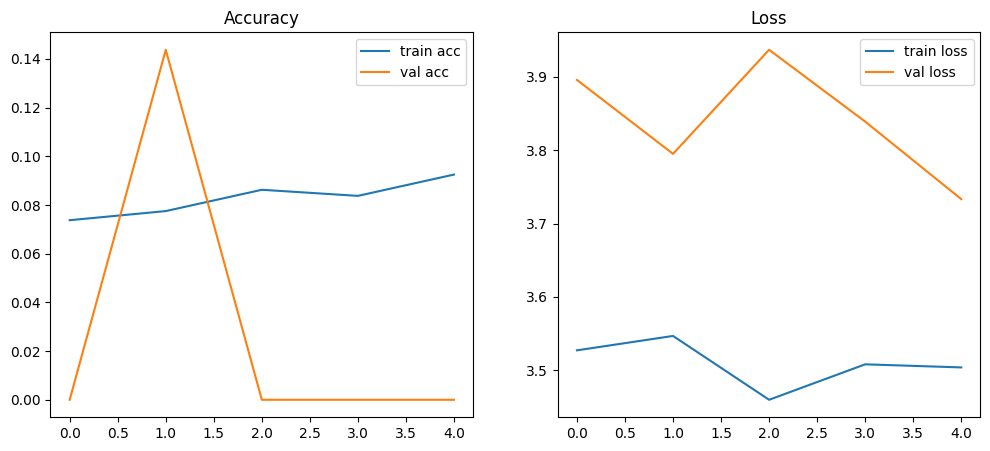

In [61]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()


In [62]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    steps_per_epoch=50,   # limit steps for faster testing
    validation_steps=20,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 453ms/step - accuracy: 0.0863 - loss: 3.4506 - val_accuracy: 0.0031 - val_loss: 3.9360 - learning_rate: 0.0010
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 430ms/step - accuracy: 0.1004 - loss: 3.5000 - val_accuracy: 0.0031 - val_loss: 3.8077 - learning_rate: 0.0010
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 423ms/step - accuracy: 0.0689 - loss: 3.5223 - val_accuracy: 0.0000e+00 - val_loss: 3.9078 - learning_rate: 0.0010
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.0911 - loss: 3.4468 - val_accuracy: 0.0000e+00 - val_loss: 3.7262 - learning_rate: 0.0010
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.0897 - loss: 3.4076 - val_accuracy: 0.0219 - val_loss: 3.8510 - learning_rate: 0.0010


In [64]:
'/kaggle/input/brain-tumor-mri-images-44c/Astrocitoma T1/005_big_gallery.jpeg'
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    steps_per_epoch=50,   # limit steps for faster testing
    validation_steps=20,
    callbacks=[early_stop, reduce_lr]
)



Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 455ms/step - accuracy: 0.0835 - loss: 3.5119 - val_accuracy: 0.0000e+00 - val_loss: 3.8561 - learning_rate: 0.0010
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 430ms/step - accuracy: 0.0939 - loss: 3.4785 - val_accuracy: 0.0094 - val_loss: 3.7836 - learning_rate: 0.0010
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 421ms/step - accuracy: 0.0795 - loss: 3.4355 - val_accuracy: 0.1562 - val_loss: 3.6315 - learning_rate: 0.0010
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 406ms/step - accuracy: 0.0819 - loss: 3.3780 - val_accuracy: 0.0437 - val_loss: 3.7831 - learning_rate: 0.0010
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.0981 - loss: 3.4076 - val_accuracy: 0.0000e+00 - val_loss: 3.9117 - learning_rate: 0.0010
